# Introduction

Dataset: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset

Task: Predicting Loan Status (Yes/No)

# Importing Libraries 

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings

import seaborn as sns

from scipy import stats 

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')

# Importing the data

In [3]:
df = pd.read_csv('./train.csv')

# Analysing the data 

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Null Values

In [7]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Distribution of data

In [8]:
def distribution_plots(dataframe, cols):
    for col in cols:
        fig, axs = plt.subplots(1, 2, figsize=(15, 6))
        sns.histplot(data=dataframe, x=col, kde=True, ax=axs[0])
        plt.subplot(1, 2, 2)
        stats.probplot(dataframe[col], dist="norm", plot=plt)
        plt.show()

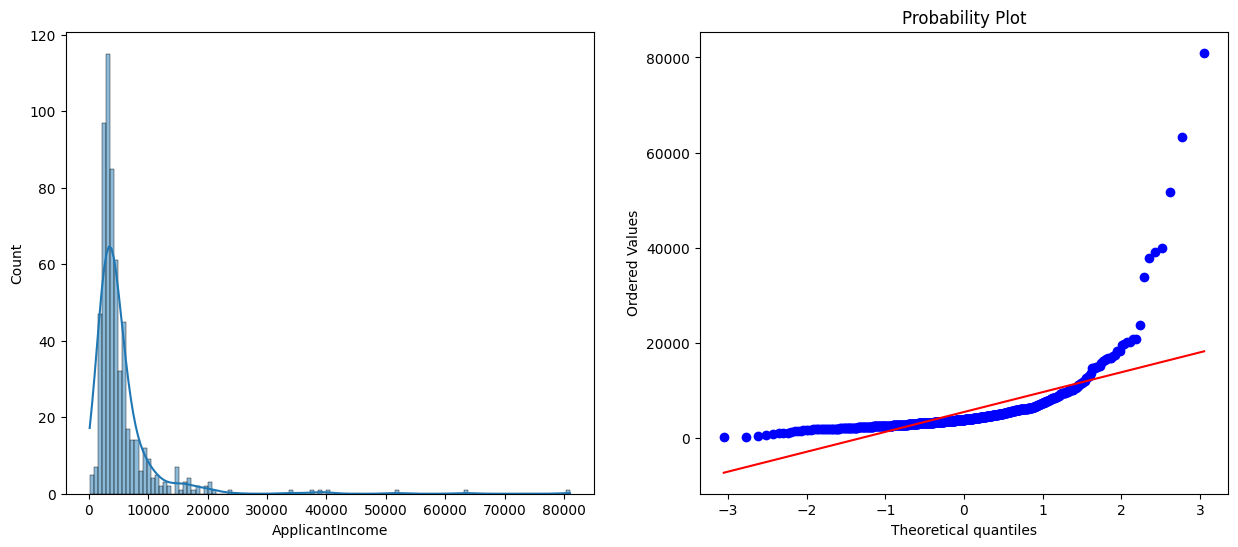

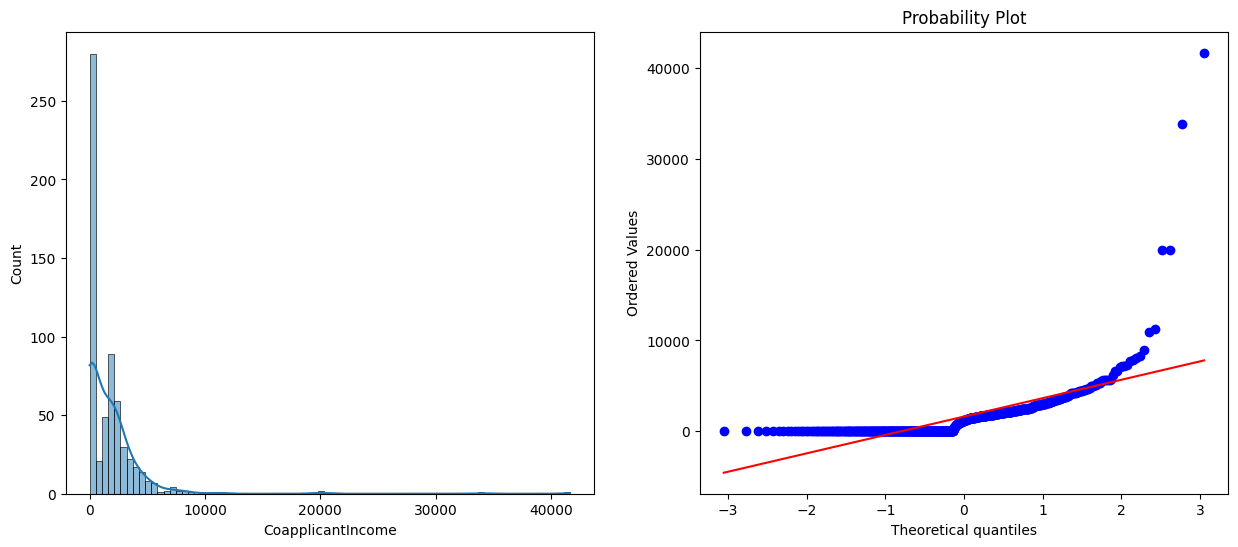

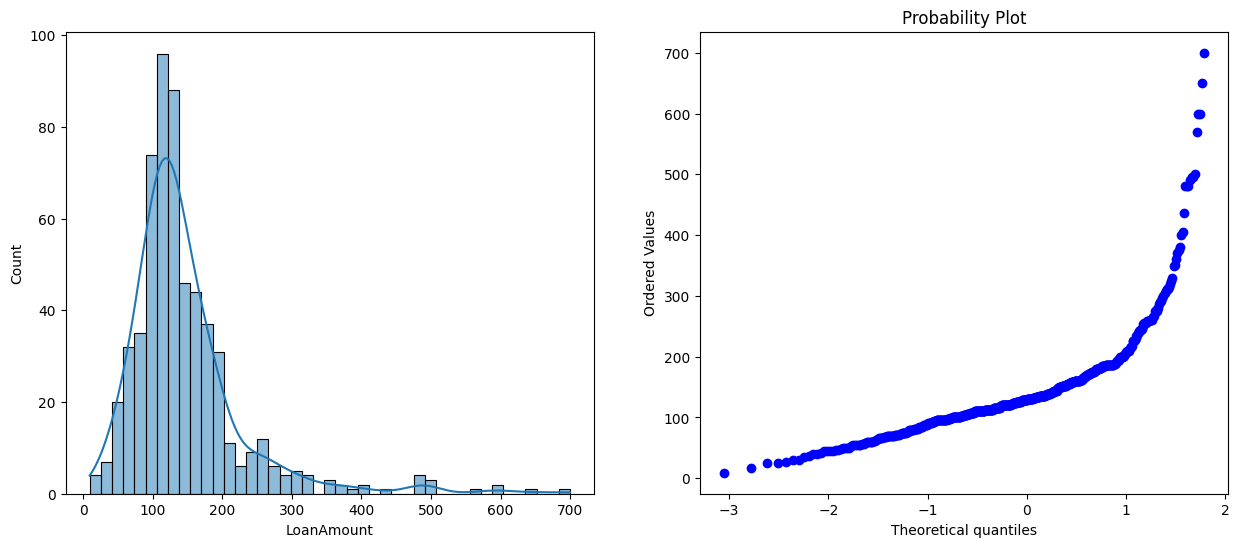

In [9]:
distribution_plots(df, ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

The distributions for ApplicantIncome, CoapplicantIncome and LoanAmount are skewed. Will perform transformations on these features to achieve a distribution closer to normal distribution.

### Outlier Analysis

In [10]:
def boxplot(dataframe, col):
    sns.boxplot(x='Loan_Status', y=col, data=dataframe)

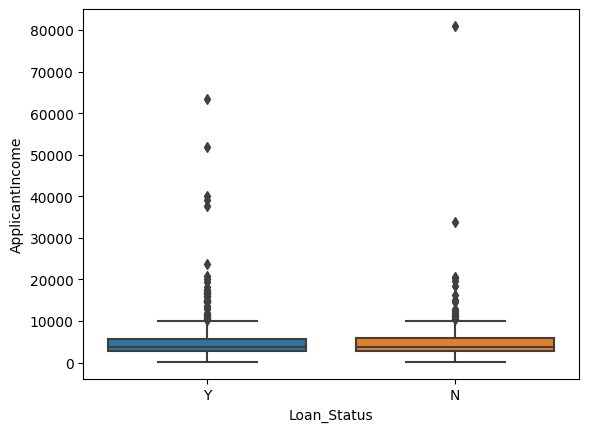

In [11]:
boxplot(df, 'ApplicantIncome')

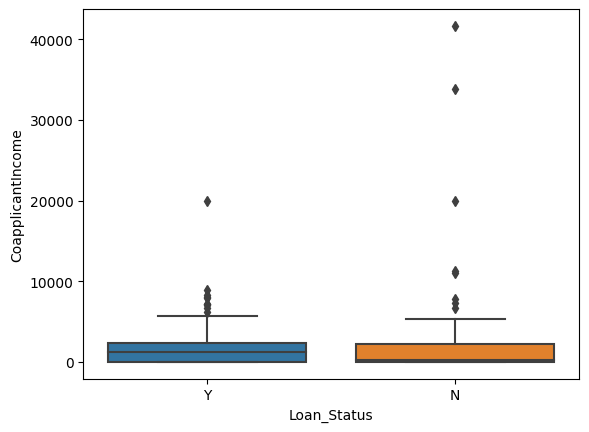

In [12]:
boxplot(df, 'CoapplicantIncome')

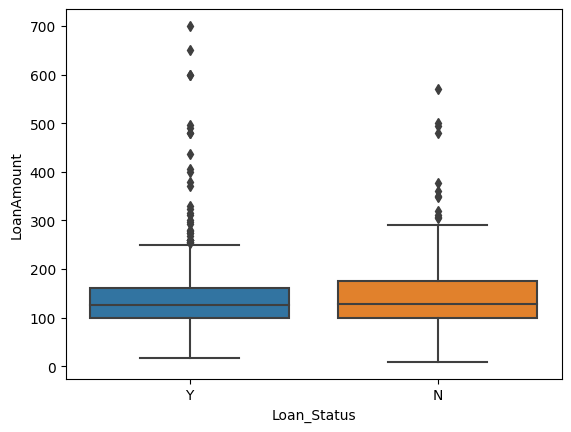

In [13]:
boxplot(df, 'LoanAmount')

# Data Preprocessing

### Dropping Unnecessary features

From the data, Load_ID will have no bearing on loan status. Hence, it will be dropped.

In [14]:
df = df.drop('Loan_ID', axis=1)

### Handling Null Values

Null values for all categorical features will be replaced by mode of the feature.

#### Gender

In [15]:
df.Gender.value_counts(dropna=False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

In [16]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

#### Married

In [17]:
df.Married.value_counts(dropna=False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

In [18]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

#### Dependents

In [19]:
df.Dependents.value_counts(dropna=False)

Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64

In [20]:
df['Dependents'].replace('3+', 3, inplace=True)

In [21]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

#### Self_Employed

In [22]:
df.Self_Employed.value_counts(dropna=False)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

In [23]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

#### Loan Amount

In [24]:
df.LoanAmount.value_counts(dropna=False)

LoanAmount
NaN      22
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 204, dtype: int64

Loan Amount is a continuous field. Null values will be replaced by the mean.

In [25]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

#### Loan Amount Term

In [26]:
df.Loan_Amount_Term.value_counts(dropna=False)

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [27]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

#### Credit History

In [28]:
df.Credit_History.value_counts(dropna=False)

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

In [29]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

### One hot Encoding

One hot enocoding the following categorical features

In [30]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first, dtype=int)
    return dataframe

In [31]:
df = one_hot_encoder(df, ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'])

In [32]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.412162,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128.000000,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.000000,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.000000,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.000000,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1


### Outlier Removal

Removing outlier values in ApplicantIncome, CoapplicantIncome and LoanAmount.

In [33]:
def outlier_removal(column):
    column = pd.Series.sort_values(column)
    Q1, Q3 = np.percentile(column, [75, 25])
    IQR = Q1 - Q3
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [34]:
df.drop(df[(df.ApplicantIncome > outlier_removal(df.ApplicantIncome)[1]) | (df.ApplicantIncome < outlier_removal(df.ApplicantIncome)[0]) ].index , inplace=True)
df.drop(df[(df.CoapplicantIncome > outlier_removal(df.CoapplicantIncome)[1]) | (df.CoapplicantIncome < outlier_removal(df.CoapplicantIncome)[0]) ].index , inplace=True)
df.drop(df[(df.LoanAmount > outlier_removal(df.LoanAmount)[1]) | (df.LoanAmount < outlier_removal(df.LoanAmount)[0]) ].index , inplace=True)

### Data transformation

ApplicantIncome, CoapplicantIncome and LoanAmount will be transformed to obtain a distribution closer to a Gaussian distribution.

In [35]:
df['ApplicantIncome'] = np.log(df.ApplicantIncome)
df['CoapplicantIncome'] = np.sqrt(df.CoapplicantIncome)
df['LoanAmount'] = np.sqrt(df.LoanAmount)

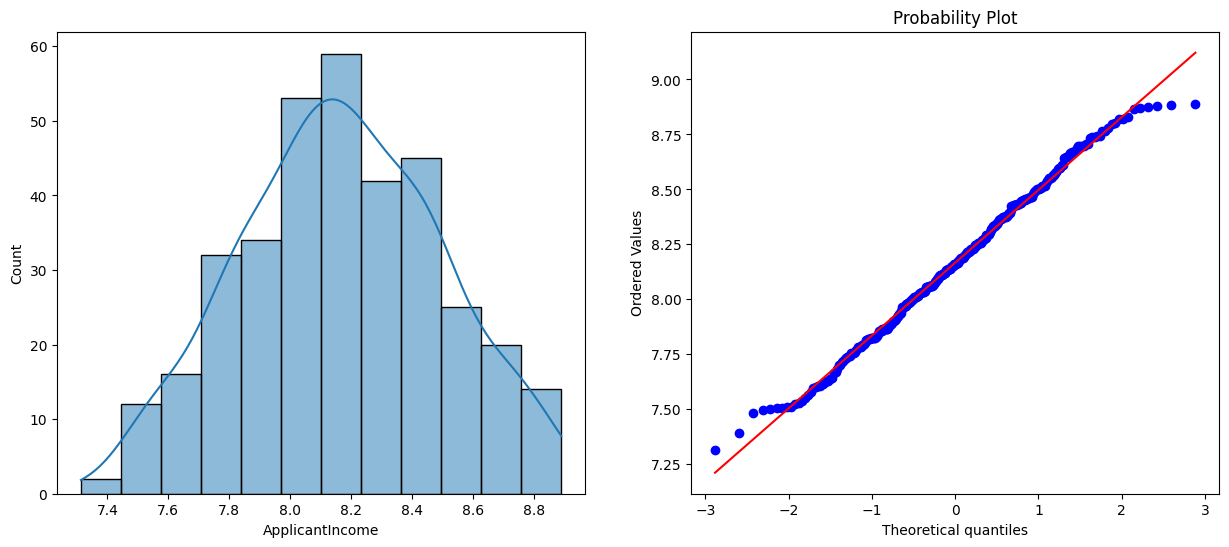

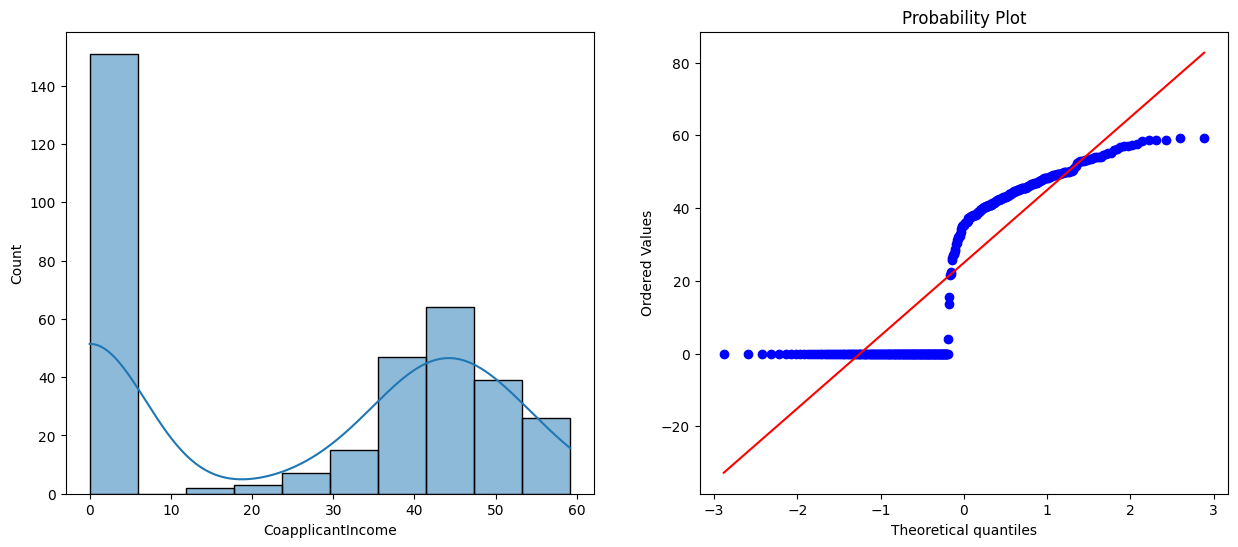

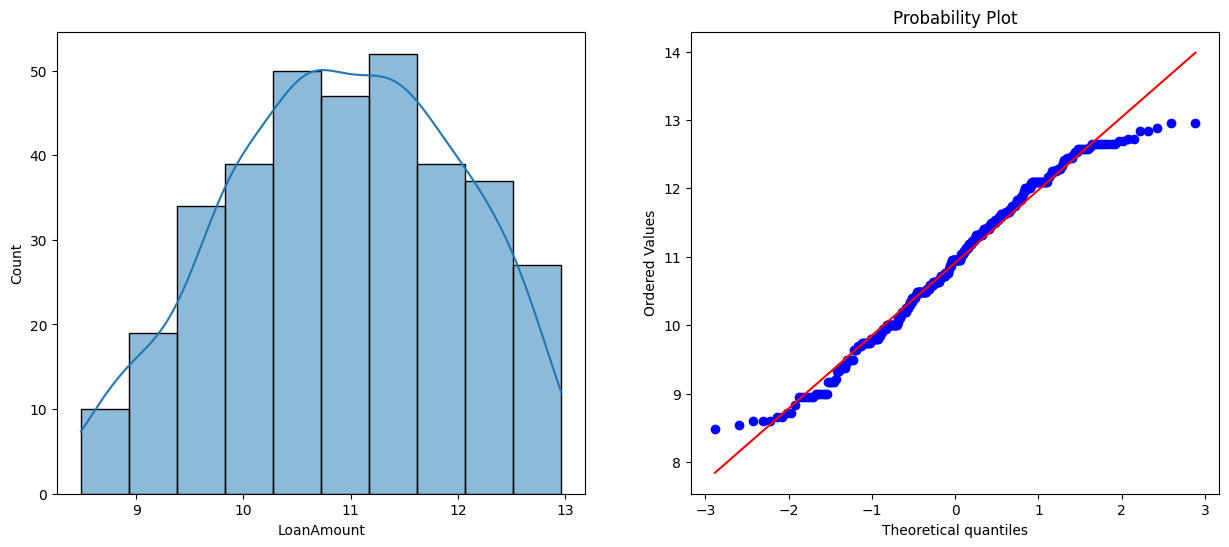

In [36]:
distribution_plots(df, ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

### Scaling the data

Loan_Amount_Term, ApplicantIncome, CoapplicantIncome and LoanAmount features will be scaled using the MinMaxScaler.

In [37]:
scaler = MinMaxScaler()
for col in ['Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    df[col] = scaler.fit_transform(df[[col]])

# Splitting data

The data needs to be split into a training set and a testing set.

In [38]:
y = df['Loan_Status']
X = df.drop('Loan_Status', axis="columns")

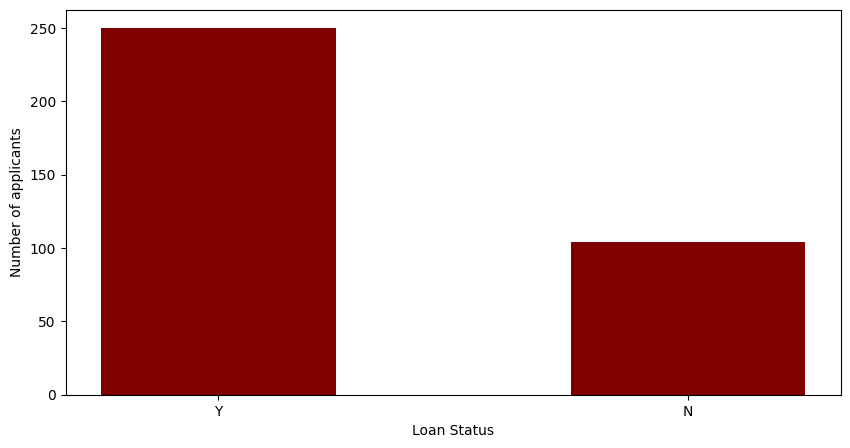

In [39]:
fig = plt.figure(figsize = (10, 5))
y_n_count = [y.value_counts()[0], y.value_counts()[1]]
vals = ['Y', 'N']
plt.bar(vals, y_n_count, color="maroon", width=0.5)
plt.xlabel("Loan Status")
plt.ylabel("Number of applicants")
plt.show()

Clearly, there are a greater number of applicants with Loan Status 'Y' as compared to 'N'. The given dataset is imbalanced, so I will use the stratified train_test_split.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [41]:
X_train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
274,2,0.606467,0.000000,0.223750,0.743590,1.0,0,1,0,1,1,0,1,0,0,1,0
537,2,0.558654,0.000000,0.415263,0.743590,1.0,0,1,1,0,1,0,1,0,0,1,0
314,0,0.317331,0.725652,0.921371,0.743590,1.0,0,1,0,1,1,0,1,0,1,0,0
558,0,0.604348,0.873253,0.947822,0.743590,1.0,0,1,0,1,1,0,1,0,0,1,0
575,2,0.472722,0.362925,0.426036,0.153846,1.0,0,1,0,1,1,0,1,0,0,0,1


# Models

In [106]:
model_scores = {}

### Random Forest Classifier

In [107]:
RFScore = {}
for i in range(2, 25):
    rfclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 100, max_leaf_nodes = i)
    rfclassifier.fit(X_train, y_train)
    y_pred_test = rfclassifier.predict(X_test)
    RFScore[i] = accuracy_score(y_test, y_pred_test)
print("Accuracy: ", max(RFScore.values()))

Accuracy:  0.9295774647887324


### Decision Tree Classifier

In [108]:
DTScore = {}
for i in range(2, 10):
    dtclassifier = DecisionTreeClassifier(max_depth = i, random_state = 100)
    dtclassifier.fit(X_train, y_train)
    y_pred_test = dtclassifier.predict(X_test)
    DTScore[i] = accuracy_score(y_test, y_pred_test)
print("Accuracy: ", max(DTScore.values()))    

Accuracy:  0.9014084507042254


### Logistic Regression

In [90]:
logreg = LogisticRegression(random_state = 100)
logreg.fit(X_train, y_train)
y_pred_test = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy: ", logreg_accuracy)

Accuracy:  0.8873239436619719


### Gaussian Naive Bayes

In [110]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred_test = gaussian_nb.predict(X_test)
gaussian_nb_acc = accuracy_score(y_test, y_pred_test)
print("Accuracy: ", gaussian_nb_acc)

Accuracy:  0.8732394366197183


### Support Vector Machine

In [109]:
svc_classifier = SVC() 
svc_classifier.fit(X_train, y_train)
y_pred_test = svc_classifier.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred_test)
print("Accuracy: ", svc_acc)

Accuracy:  0.9014084507042254


# Comparing Models

In [113]:
scores = pd.DataFrame({'Model': ['Random Forest Classifier', 'Decision Tree Classifier'
                                 , 'Logistic Regression', 'Gaussian Naive Bayes', 'Support Vector Machine'], 
                       'Accuracy': [max(RFScore.values())*100, max(DTScore.values())*100 , logreg_accuracy*100, 
                                   gaussian_nb_acc*100, svc_acc*100]})
scores.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy
0,Random Forest Classifier,92.957746
1,Decision Tree Classifier,90.140845
4,Support Vector Machine,90.140845
2,Logistic Regression,88.732394
3,Gaussian Naive Bayes,87.323944


The Random Forest Classifier performs the best with an accuracy of 92.95%.